# Question 1

In [17]:
free_matrix = 
[
0 0 1 1 0 0 0 1 1 0 0 0 0;
0 1 1 0 0 0 0 0 1 1 0 0 0;
0 0 0 1 1 0 1 1 0 1 1 1 1;
0 0 0 1 1 1 1 1 1 1 1 1 0;
0 0 0 0 0 0 1 1 1 0 0 0 0;
0 1 1 0 0 0 0 0 1 1 0 0 0;
0 0 0 1 1 1 1 0 0 0 0 0 0;
1 1 0 0 0 0 0 0 0 0 1 1 1;
1 1 1 0 0 0 0 0 0 1 1 0 0;
0 0 0 0 0 0 0 1 1 0 0 0 0;
0 0 0 0 0 0 1 1 1 0 0 0 0;
1 1 0 0 0 1 1 1 1 0 0 1 1;
1 1 1 0 1 1 0 0 0 0 0 1 1;
0 1 1 1 0 0 0 0 0 0 0 0 0;
1 1 0 0 1 1 0 0 0 0 0 0 0;
]

demand = [1 1 1 1 1 1 3 1 1 1 1 1 1]
times = ["10:00", "10:20" ,"10:40", "11:00", "11:20", "11:40", "Lunch", "1:00", "1:20", "1:40" , "2:00", "2:20", "2:40"]
names = ["Manuel" , "Luca" , "Jule" , "Michael", "Malte", "Chris", "Spyros", "Mirjam", "Matt", "Florian", "Josep", "Joel" ,"Tom" , "Daniel" ,"Anne"]

15-element Array{String,1}:
 "Manuel" 
 "Luca"   
 "Jule"   
 "Michael"
 "Malte"  
 "Chris"  
 "Spyros" 
 "Mirjam" 
 "Matt"   
 "Florian"
 "Josep"  
 "Joel"   
 "Tom"    
 "Daniel" 
 "Anne"   

In [28]:
using JuMP
m = Model()
@variable(m, x[1:15,1:13] >= 0)
for i in 1:15
    @constraint(m , dot(x[i,:], free_matrix[i,:]) == 1)
end
for i in 1:13
    @constraint(m, sum(x[:,i]) == demand[i])
end
solve(m)

:Optimal

### Final Schedule

In [29]:
x_val = getvalue(x)
for t in 1:13
    print(times[t], ": ")
    for i in 1:15
        if x_val[i, t] > 0
            print(names[i] , " ")
        end
    end
    println()
end

10:00: Joel 
10:20: Chris 
10:40: Tom 
11:00: Daniel 
11:20: Anne 
11:40: Spyros 
Lunch: Michael Malte Josep 
1:00: Manuel 
1:20: Florian 
1:40: Luca 
2:00: Matt 
2:20: Mirjam 
2:40: Jule 


# Question 2

In [38]:
pos = [
    0 20 18 30 35 33 5 5 11 2;
    0 20 10 12 0 25 27 10 0 15
]
required = [10 6 8 11 9 7 15 7 9 12]
present = [8 13 4 8 12 2 14 11 15 7]
distances = zeros( 10,10)
for i in 1:10
    for j in 1:10
        delta = pos[:,i] - pos[:,j]
        distances[i,j] = dot(delta,delta)
    end
end


10×10 Array{Float64,2}:
    0.0  800.0  424.0  1044.0  1225.0  1714.0   754.0   125.0   121.0   229.0
  800.0    0.0  104.0   164.0   625.0   194.0   274.0   325.0   481.0   349.0
  424.0  104.0    0.0   148.0   389.0   450.0   458.0   169.0   149.0   281.0
 1044.0  164.0  148.0     0.0   169.0   178.0   850.0   629.0   505.0   793.0
 1225.0  625.0  389.0   169.0     0.0   629.0  1629.0  1000.0   576.0  1314.0
 1714.0  194.0  450.0   178.0   629.0     0.0   788.0  1009.0  1109.0  1061.0
  754.0  274.0  458.0   850.0  1629.0   788.0     0.0   289.0   765.0   153.0
  125.0  325.0  169.0   629.0  1000.0  1009.0   289.0     0.0   136.0    34.0
  121.0  481.0  149.0   505.0   576.0  1109.0   765.0   136.0     0.0   306.0
  229.0  349.0  281.0   793.0  1314.0  1061.0   153.0    34.0   306.0     0.0

In [41]:
m = Model()
@variable(m, x[1:10,1:10] >= 0)
for i in 1:10
    @constraint(m, sum(x[:,i]) - sum(x[i,:]) + present[i] == required[i])
end
@objective(m,Min, sum(distances .* x))
solve(m)

:Optimal

### Optimal movement is

In [47]:
x_val = getvalue(x)

for i in 1:10
    for j in 1:10
        val = x_val[i,j]
        if val > 0
            println("Agency ", i , " sends " ,  x_val[i,j] , " cars to agency ", j )
        end
    end
end

Agency 2 sends 1.0 cars to agency 3
Agency 2 sends 5.0 cars to agency 6
Agency 2 sends 1.0 cars to agency 7
Agency 5 sends 3.0 cars to agency 4
Agency 8 sends 5.0 cars to agency 10
Agency 9 sends 2.0 cars to agency 1
Agency 9 sends 3.0 cars to agency 3
Agency 9 sends 1.0 cars to agency 8


# Question 3
## a.

In [53]:
duration = [2; 16; 9 ; 8; 10 ; 6 ; 2 ;2 ; 9 ; 5 ;3 ;2 ;1 ;7 ;4 ;3 ;9 ;1; 0]
pred = zeros(19,19)
pred[2,1]=1
pred[3,2]=1
pred[4,2]=1
pred[5,3]=1
pred[6,4] = 1
pred[6,5] = 1
pred[7,4] =1
pred[8,6] = 1
pred[9,4] = 1
pred[9,6] = 1
pred[10,4] = 1
pred[11,6] = 1
pred[12,9] = 1
pred[13,7] = 1
pred[14,2] = 1
pred[15,4] = 1
pred[15,14] = 1
pred[16,8] = 1
pred[16,11] = 1
pred[16,14] = 1
pred[17,12] =1
pred[18,17] = 1
for i in 1:18
    pred[19,i] = 1
end



In [61]:
m = Model()
@variable(m, x[1:19] >= 0)
for i in 1:19
    for j in 1:19
        if pred[i,j] > 0
            @constraint(m, x[i] >= x[j] + duration[j])
        end
    end
end
@objective(m,Min, x[19])
solve(m)


:Optimal

### The earliest possible time to finish is 

In [63]:
getobjectivevalue(m)

64.0

## b.

In [72]:
max_reduction = [0; 3; 1; 2; 2; 1; 1; 0; 2; 1; 1; 0; 0; 2; 2; 1; 3; 0]
reduction_cost = [0; 30; 26; 12; 17; 15; 8; 0; 42; 21; 18; 0 ; 0; 22; 12; 6; 16; 0]

times = zeros(0)
costs = zeros(0)

for weeks_early in 0:64
    m = Model()
    @variable(m, x[1:19] >= 0)
    @variable(m, reduc[1:18]>=0)
    for i in 1:19
        for j in 1:19
            if pred[i,j] > 0
                @constraint(m, x[i] >= x[j] + duration[j] - reduc[j])
            end
        end
    end
    @constraint(m,x[19] == 64 - weeks_early)
    @constraint(m, reduc .<= max_reduction)
    @objective(m,Min, dot(reduction_cost,reduc))
    solve(m)
    cost = getobjectivevalue(m)
    if isnan(cost)
        break
    end
    append!(times, weeks_early)
    append!(costs, cost)
end
    

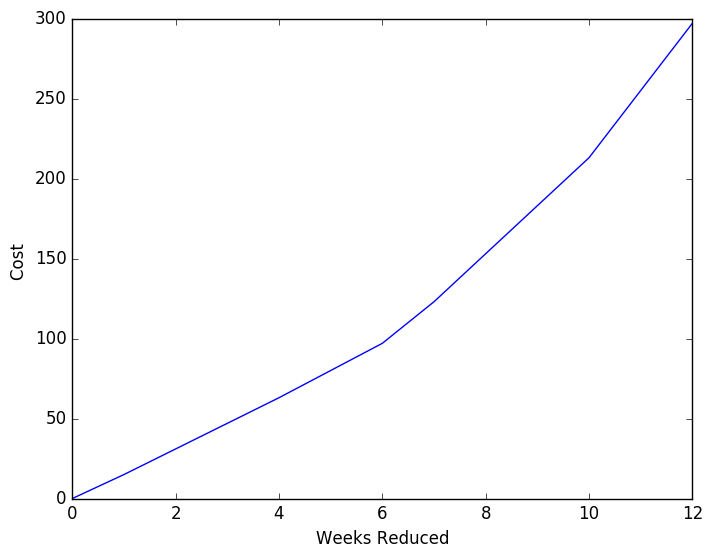

PyObject <matplotlib.text.Text object at 0x7fa04fc0ca20>

In [74]:
using PyPlot
plot(times,costs)
xlabel("Weeks Reduced")
ylabel("Cost ")

In [75]:
times

13-element Array{Float64,1}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0

## c.

### To maximize profit the project will be completed

In [76]:
m = Model()
@variable(m, x[1:19] >= 0)
@variable(m, reduc[1:18]>=0)
@variable(m, weeks_early >= 0)

for i in 1:19
    for j in 1:19
        if pred[i,j] > 0
            @constraint(m, x[i] >= x[j] + duration[j] - reduc[j])
        end
    end
end
@constraint(m,x[19] == 64 - weeks_early)
@constraint(m, reduc .<= max_reduction)
@objective(m,Max, 30 * weeks_early - dot(reduction_cost,reduc))
solve(m)
println(getvalue(weeks_early) , " weeks early.")

7.0 weeks early.
